In [82]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import torch

In [83]:
# def plot_predictions_and_ground_truth(image_path, pred_bboxes, gt_bboxes):
#     if not os.path.exists(image_path):
#         raise FileNotFoundError(f"The image file does not exist: {image_path}")
    
#     try:
#         image = Image.open(image_path)
#         image = np.array(image)
#     except Exception as e:
#         raise IOError(f"Error reading the image: {e}")
    
#     if len(image.shape) == 2:
#         image = np.stack((image,) * 3, axis=-1)
#     height, width = image.shape[:2]
    
#     # Channel names
#     channel_names = ['T1', 'T2', 'T2S']
    
#     fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
#     for channel_idx, channel_name in enumerate(channel_names):
#         channel = image[:, :, channel_idx]
        
#         # Plot image
#         ax = axes[channel_idx]
#         ax.imshow(channel, cmap='gray')
#         ax.axis('off')
        
#         for bbox in pred_bboxes:
#             x, y, pred_width, pred_height = bbox
            
            
#             rect = plt.Rectangle((x, y), pred_width, pred_height,
#                                linewidth=1.5, edgecolor='blue', facecolor='none', 
#                                linestyle='-', label='Prediction' if channel_idx == 0 else "")
#             ax.add_patch(rect)
        
#         for bbox in gt_bboxes:
#             class_id, x_center, y_center, gt_width, gt_height = bbox
#             center_x = int(x_center * width)
#             center_y = int(y_center * height)
            
#             patch_size_w = gt_width * width
#             patch_size_h = gt_height * height
            
#             x_min = center_x - patch_size_w // 2
#             y_min = center_y - patch_size_h // 2
            
#             if class_id == 0:
#                 rect = plt.Rectangle((x_min, y_min), patch_size_w, patch_size_h,
#                                linewidth=1, edgecolor='red', facecolor='none',
#                                linestyle='-', label='Ground Truth' if channel_idx == 0 else "")

#             elif class_id == 1:
#                 rect = plt.Rectangle((x_min, y_min), patch_size_w, patch_size_h,
#                                linewidth=1, edgecolor='green', facecolor='none',
#                                linestyle='-', label='Ground Truth' if channel_idx == 0 else "")

#             ax.add_patch(rect)
    
#     if pred_bboxes and gt_bboxes:
#         from matplotlib.patches import Patch
#         legend_elements = [
#             Patch(facecolor='none', edgecolor='green', linewidth=1, label='Prediction'),
#             Patch(facecolor='none', edgecolor='green', linewidth=1, label='Ground Truth')
#         ]
#         fig.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.98, 0.95))
    
#     plt.tight_layout()
#     plt.show()

# def visualize_predictions_and_ground_truth(root_path, img_num, slice_num, yolo_predictions):
#     """
#     Visualize both YOLO predictions and ground truth on the same image
    
#     Args:
#         root_path: Root path to the dataset
#         img_num: Image number (e.g., "110")
#         slice_num: Slice number (e.g., "030")
#         yolo_predictions: List of YOLO prediction dictionaries
#     """
#     # Construct paths
#     label_path = f"{root_path}/labels/{task}/sub-{img_num}_slice_{slice_num}.txt"
#     image_path = label_path.replace("labels", "images").replace("txt", "png")
#     image_id = f"sub-{img_num}_slice_{slice_num}"
    
#     try:
#         # Load ground truth bounding boxes
#         gt_bboxes = []
#         if os.path.exists(label_path):
#             with open(label_path, 'r') as txt_file:
#                 gt_bboxes = [list(map(float, line.split())) for line in txt_file.readlines()]
        
#         # Filter predictions for this specific image
#         pred_bboxes = []
#         for pred in yolo_predictions:
#             if pred['image_id'] == image_id:
#                 bbox = pred['bbox']
#                 # Only include predictions with non-zero bounding boxes
#                 if bbox[2] > 0 and bbox[3] > 0:  # width and height > 0
#                     pred_bboxes.append(bbox)
        
#         # Plot both predictions and ground truth
#         plot_predictions_and_ground_truth(image_path, pred_bboxes, gt_bboxes)
        
#         print(f"Image: {image_id}")
#         print(f"Ground Truth boxes: {len(gt_bboxes)}")
#         print(f"Prediction boxes: {len(pred_bboxes)}")
        
#     except Exception as e:
#         print(f"An error occurred: {e}")
#         try:
#             with Image.open(image_path) as img:
#                 print(f"Image format: {img.format}")
#                 print(f"Image size: {img.size}")
#                 print(f"Image mode: {img.mode}")
#         except Exception as e:
#             print(f"Could not open the image for additional information: {e}")

In [84]:
def plot_predictions_and_ground_truth(image_path, pred_bboxes, gt_bboxes, yolo_predictions, img_num, slice_num):
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"The image file does not exist: {image_path}")
    
    try:
        image = Image.open(image_path)
        image = np.array(image)
    except Exception as e:
        raise IOError(f"Error reading the image: {e}")
    
    if len(image.shape) == 2:
        image = np.stack((image,) * 3, axis=-1)
    height, width = image.shape[:2]
    
    # Channel names
    channel_names = ['T1', 'T2', 'T2S']
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    for channel_idx, channel_name in enumerate(channel_names):
        channel = image[:, :, channel_idx]
        
        # Plot image
        ax = axes[channel_idx]
        ax.imshow(channel, cmap='gray')
        ax.axis('off')
        
        # Draw prediction bounding boxes
        for pred in yolo_predictions:
            if pred['image_id'] == f"sub-{img_num}_slice_{slice_num}":
                category_id = pred['category_id']
                x, y, pred_width, pred_height = pred['bbox']
                
                # Only include predictions with non-zero bounding boxes
                if pred_width > 0 and pred_height > 0:
                    if category_id == 1:
                        # Blue for category 1
                        rect = plt.Rectangle((x, y), pred_width, pred_height,
                                           linewidth=2, edgecolor='blue', facecolor='none', 
                                           linestyle='-')
                        ax.add_patch(rect)
                    elif category_id == 2:
                        # White for category 2
                        rect = plt.Rectangle((x, y), pred_width, pred_height,
                                           linewidth=0.5, edgecolor='pink', facecolor='none', 
                                           linestyle='-')
                        ax.add_patch(rect)
        
        # Draw ground truth bounding boxes
        for bbox in gt_bboxes:
            class_id, x_center, y_center, gt_width, gt_height = bbox
            center_x = int(x_center * width)
            center_y = int(y_center * height)
            
            patch_size_w = gt_width * width
            patch_size_h = gt_height * height
            
            x_min = center_x - patch_size_w // 2
            y_min = center_y - patch_size_h // 2
            
            if class_id == 0:
                # Red for class 0
                rect = plt.Rectangle((x_min, y_min), patch_size_w, patch_size_h,
                                   linewidth=1, edgecolor='red', facecolor='none',
                                   linestyle='-')
                ax.add_patch(rect)
            elif class_id == 1:
                # Pink for class 1
                rect = plt.Rectangle((x_min, y_min), patch_size_w, patch_size_h,
                                   linewidth=1, edgecolor='green', facecolor='none',
                                   linestyle='-')
                ax.add_patch(rect)
    
    # Create legend with correct colors
    if pred_bboxes or gt_bboxes:
        from matplotlib.patches import Patch
        legend_elements = []
        
        # Add prediction legend entries
        if any(pred['category_id'] == 1 for pred in yolo_predictions if pred['image_id'] == f"sub-{img_num}_slice_{slice_num}"):
            legend_elements.append(Patch(facecolor='none', edgecolor='blue', linewidth=1, label='CMB-Pred'))
        if any(pred['category_id'] == 2 for pred in yolo_predictions if pred['image_id'] == f"sub-{img_num}_slice_{slice_num}"):
            legend_elements.append(Patch(facecolor='none', edgecolor='pink', linewidth=1, label='CSF-Pred'))
        
        # Add ground truth legend entries
        if any(bbox[0] == 0 for bbox in gt_bboxes):
            legend_elements.append(Patch(facecolor='none', edgecolor='red', linewidth=1, label='CMB-GT'))
        if any(bbox[0] == 1 for bbox in gt_bboxes):
            legend_elements.append(Patch(facecolor='none', edgecolor='green', linewidth=1, label='CSF-GT'))
        
        if legend_elements:
            fig.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.98, 0.95))
    
    plt.tight_layout()
    plt.show()

def visualize_predictions_and_ground_truth(root_path, img_num, slice_num, yolo_predictions):
    """
    Visualize both YOLO predictions and ground truth on the same image
    
    Args:
        root_path: Root path to the dataset
        img_num: Image number (e.g., "110")
        slice_num: Slice number (e.g., "030")
        yolo_predictions: List of YOLO prediction dictionaries
    """
    # Construct paths
    label_path = f"{root_path}/labels/{task}/sub-{img_num}_slice_{slice_num}.txt"
    image_path = label_path.replace("labels", "images").replace("txt", "png")
    image_id = f"sub-{img_num}_slice_{slice_num}"
    
    try:
        # Load ground truth bounding boxes
        gt_bboxes = []
        if os.path.exists(label_path):
            with open(label_path, 'r') as txt_file:
                gt_bboxes = [list(map(float, line.split())) for line in txt_file.readlines()]
        
        # Filter predictions for this specific image
        pred_bboxes = []
        for pred in yolo_predictions:
            if pred['image_id'] == image_id:
                bbox = pred['bbox']
                # Only include predictions with non-zero bounding boxes
                if bbox[2] > 0 and bbox[3] > 0:  # width and height > 0
                    pred_bboxes.append(bbox)
        
        # Plot both predictions and ground truth
        plot_predictions_and_ground_truth(image_path, pred_bboxes, gt_bboxes, yolo_predictions, img_num, slice_num)
        
        print(f"Image: {image_id}")
        print(f"Ground Truth boxes: {len(gt_bboxes)}")
        print(f"Prediction boxes: {len(pred_bboxes)}")
        
        # Print class distribution
        if gt_bboxes:
            gt_classes = [int(bbox[0]) for bbox in gt_bboxes]
            print(f"GT Class distribution: {dict(zip(*np.unique(gt_classes, return_counts=True)))}")
        
        if yolo_predictions:
            pred_categories = [pred['category_id'] for pred in yolo_predictions if pred['image_id'] == image_id and pred['bbox'][2] > 0 and pred['bbox'][3] > 0]
            if pred_categories:
                print(f"Prediction Category distribution: {dict(zip(*np.unique(pred_categories, return_counts=True)))}")
        
    except Exception as e:
        print(f"An error occurred: {e}")
        try:
            with Image.open(image_path) as img:
                print(f"Image format: {img.format}")
                print(f"Image size: {img.size}")
                print(f"Image mode: {img.mode}")
        except Exception as e:
            print(f"Could not open the image for additional information: {e}")

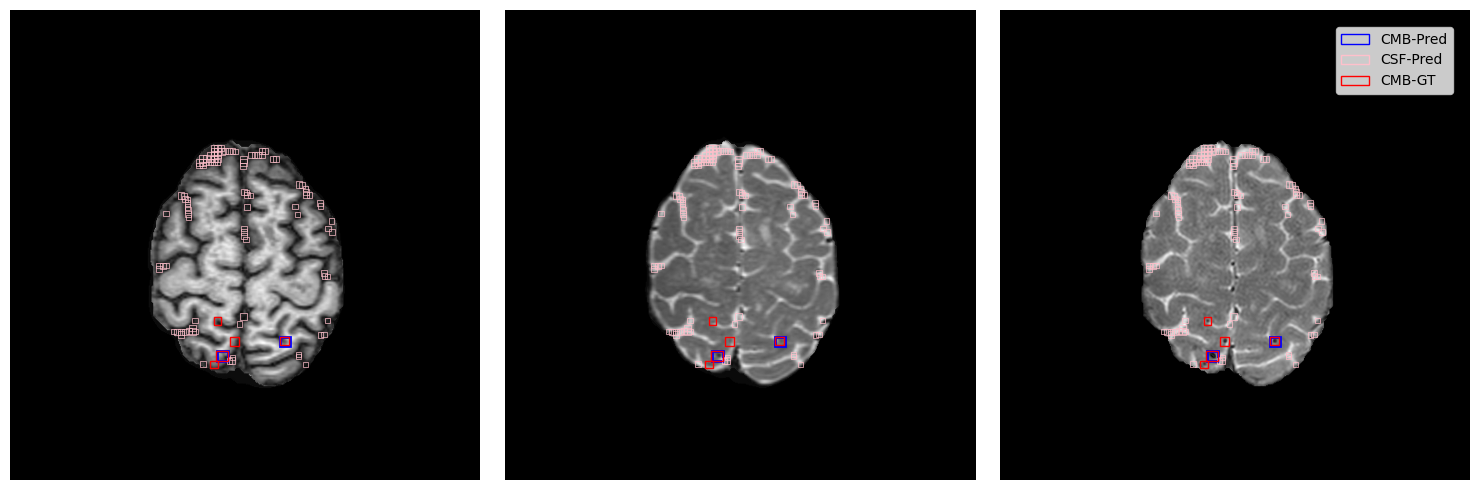

Image: sub-110_slice_030
Ground Truth boxes: 5
Prediction boxes: 100
GT Class distribution: {np.int64(0): np.int64(5)}
Prediction Category distribution: {np.int64(1): np.int64(2), np.int64(2): np.int64(98)}


In [85]:
# Your existing YOLO predictions
yolo_output = [
     {"image_id": "sub-110_slice_030", "category_id": 1, "bbox": [1177.964, 1425.915, 40.198, 35.897], "score": 0.47665}, {"image_id": "sub-110_slice_030", "category_id": 1, "bbox": [903.656, 1485.973, 45.82, 43.047], "score": 0.13146}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [1004.572, 970.667, 26.917, 26.912], "score": 0.0923}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [747.217, 1388.177, 25.838, 26.15], "score": 0.09213}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [1019.187, 793.84, 26.893, 27.021], "score": 0.09117}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [731.235, 1388.923, 26.625, 26.777], "score": 0.09078}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [760.402, 859.231, 26.276, 25.942], "score": 0.09025}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [1229.361, 843.212, 23.713, 23.85], "score": 0.08955}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [1003.71, 650.624, 26.909, 27.507], "score": 0.0895}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [956.2, 601.823, 24.922, 25.41], "score": 0.08928}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [779.441, 1384.473, 28.726, 29.056], "score": 0.08823}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [793.203, 1388.352, 24.262, 24.113], "score": 0.08816}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [746.373, 796.356, 25.393, 25.563], "score": 0.08745}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [715.407, 1388.876, 25.863, 25.932], "score": 0.08716}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [1051.961, 618.15, 24.844, 25.553], "score": 0.08684}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [1358.257, 1146.516, 24.156, 24.544], "score": 0.08674}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [762.324, 874.709, 24.561, 24.624], "score": 0.08635}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [940.6, 600.993, 25.877, 26.52], "score": 0.08622}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [1005.544, 955.722, 26.413, 26.171], "score": 0.08562}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [888.23, 634.504, 29.217, 28.318], "score": 0.08545}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [1355.955, 1131.845, 25.218, 25.141], "score": 0.08466}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [1036.023, 617.619, 25.752, 26.679], "score": 0.08441}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [1277.943, 794.305, 24.115, 25.203], "score": 0.08436}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [891.479, 649.654, 24.249, 25.007], "score": 0.08411}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [1291.987, 793.91, 24.358, 25.46], "score": 0.08394}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [668.234, 1100.663, 23.643, 23.661], "score": 0.08363}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [824.849, 649.923, 30.562, 30.468], "score": 0.08347}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [1371.205, 1149.835, 22.609, 22.556], "score": 0.08334}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [1131.292, 634.126, 27.541, 27.598], "score": 0.08334}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [651.56, 1100.808, 26.199, 26.571], "score": 0.08321}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [970.916, 604.913, 22.917, 22.855], "score": 0.08298}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [766.027, 891.548, 23.041, 23.322], "score": 0.08288}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [759.933, 843.931, 25.557, 25.177], "score": 0.08274}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [1003.069, 1321.718, 28.172, 28.588], "score": 0.08249}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [1016.675, 986.907, 24.509, 24.688], "score": 0.08239}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [1242.593, 878.519, 21.609, 21.74], "score": 0.08223}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [1067.508, 617.922, 25.342, 25.686], "score": 0.08067}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [760.291, 812.211, 23.832, 23.367], "score": 0.08054}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [730.069, 1399.653, 27.222, 28.006], "score": 0.08052}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [1339.736, 842.55, 24.919, 25.544], "score": 0.08047}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [877.204, 648.707, 24.268, 24.878], "score": 0.08039}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [1035.402, 797.383, 21.9, 21.689], "score": 0.08029}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [764.571, 1386.712, 25.964, 26.442], "score": 0.08023}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [874.048, 634.307, 29.766, 28.995], "score": 0.07999}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [1244.153, 746.433, 26.242, 26.615], "score": 0.07979}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [841.994, 650.834, 26.107, 25.927], "score": 0.07947}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [827.382, 1530.659, 24.676, 24.547], "score": 0.07924}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [1258.799, 747.844, 26.487, 26.13], "score": 0.07922}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [1276.982, 779.146, 26.218, 26.055], "score": 0.0792}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [1276.922, 1531.358, 22.124, 22.583], "score": 0.07903}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [1017.697, 782.379, 24.365, 23.716], "score": 0.07878}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [1372.547, 939.758, 24.064, 24.782], "score": 0.07856}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [1003.169, 665.645, 25.197, 25.56], "score": 0.07812}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [1002.672, 636.505, 28.747, 28.079], "score": 0.0778}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [1018.988, 843.53, 27.852, 27.656], "score": 0.07772}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [749.682, 810.221, 24.189, 24.457], "score": 0.07755}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [924.109, 601.763, 26.711, 27.044], "score": 0.07749}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [1246.323, 1497.272, 21.709, 22.412], "score": 0.07734}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [858.805, 633.559, 29.144, 28.903], "score": 0.07733}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [811.954, 664.93, 23.321, 24.194], "score": 0.07728}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [701.635, 1388.705, 22.531, 22.514], "score": 0.07727}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [809.598, 649.483, 30.098, 30.37], "score": 0.07709}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [1274.559, 764.249, 25.614, 25.39], "score": 0.07703}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [637.7, 1115.432, 23.316, 23.721], "score": 0.07687}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [952.714, 1512.845, 27.987, 28.321], "score": 0.07674}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [890.334, 586.901, 27.094, 27.181], "score": 0.0767}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [889.653, 617.887, 29.108, 28.653], "score": 0.07669}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [732.657, 794.051, 26.256, 26.862], "score": 0.07657}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [636.534, 1100.949, 24.287, 24.512], "score": 0.07632}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [760.092, 828.297, 23.772, 24.1], "score": 0.07619}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [1355.63, 1402.063, 23.811, 23.761], "score": 0.07557}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [905.738, 601.292, 28.875, 29.059], "score": 0.07551}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [943.332, 1517.221, 23.961, 23.58], "score": 0.07545}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [842.033, 633.347, 29.175, 29.067], "score": 0.07533}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [1083.54, 617.466, 25.348, 25.609], "score": 0.07512}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [889.565, 600.535, 29.9, 30.068], "score": 0.07484}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [906.082, 586.874, 27.048, 26.932], "score": 0.07469}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [956.503, 1500.715, 24.823, 24.418], "score": 0.07456}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [828.74, 665.004, 22.8, 23.495], "score": 0.07452}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [873.835, 600.167, 29.539, 29.991], "score": 0.07432}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [780.063, 1370.174, 28.378, 28.512], "score": 0.07426}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [1370.342, 1340.12, 24.64, 25.138], "score": 0.07421}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [1388.542, 954.743, 26.904, 26.333], "score": 0.0742}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [989.779, 1356.844, 22.095, 22.706], "score": 0.07405}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [1341.299, 1404.539, 22.803, 22.364], "score": 0.07404}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [1008.157, 941.156, 22.649, 22.446], "score": 0.07389}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [874.091, 617.922, 29.38, 29.004], "score": 0.07376}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [861.176, 648.61, 24.2, 24.661], "score": 0.07352}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [1336.996, 826.467, 27.819, 27.884], "score": 0.07346}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [1388.602, 907.405, 22.831, 22.939], "score": 0.073}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [1146.257, 634.773, 27.416, 27.455], "score": 0.07279}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [794.664, 1340.545, 22.192, 22.335], "score": 0.07269}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [1082.442, 599.855, 28.729, 29.03], "score": 0.07262}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [1246.595, 1487.707, 22.509, 22.102], "score": 0.07218}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [1098.329, 601.227, 25.756, 26.324], "score": 0.07202}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [876.007, 588.057, 25.18, 25.506], "score": 0.07182}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [824.967, 632.999, 29.384, 29.684], "score": 0.07182}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [858.083, 617.762, 29.053, 28.957], "score": 0.0715}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [1007.884, 781.594, 22.906, 22.452], "score": 0.07129}, {"image_id": "sub-110_slice_030", "category_id": 2, "bbox": [666.966, 875.518, 23.38, 23.481], "score": 0.07085},
]

# Your existing parameters
task = "val"
img_num = "110"
slice_num = "030"
root_path = "/media/Datacenter_storage/Ji/valdo_dataset/valdo_resample_ALFA_YOLO_PNG_epd_gt_box_GAN_2class_csf"

visualize_predictions_and_ground_truth(root_path, img_num, slice_num, yolo_output)